In [3]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing


In [4]:
pip install MLNN

  Preparing metadata (setup.py) ... done
  Created wheel for MLNN: filename=MLNN-2.2-py3-none-any.whl size=7996 sha256=2ed6342e0c21e78003662b14606b9a65ad91ef4c63613ef72a8466ac4ab189ab
  Stored in directory: /root/.cache/pip/wheels/06/5e/5a/c3d048392a71e896cf957c2516f90eece8f99708e60adacc0c
Successfully built MLNN


In [5]:
from MLNN import*

# EQUIL data

In [2]:
class Kvalues_4: # P2O5 and sulfate
    def __init__(self, x):
        x=np.array(x)
        ## P2O5
        # y=A*x^B
        A, B = 1E-9, 5.9511
        # K=x/y=(1/A)*x^(1-B)
        K_P2O5 = (1/A)*x[0]**(1-B)

        ## SO4
        # y=a+b*x
        a, b = 0.06, 0.2 # מהראש
        y_SO4 = a + b*x[1]
        K_SO4 = x[1]/y_SO4
        self.K = [K_P2O5, K_SO4]

In [3]:
class Kvalues_2: # P2O5 only
    def __init__(self, x):
        x=np.array(x)
        ## P2O5
        # y=A*x^B
        A, B = 2.3445E-15, 9.4249
        # K=x/y=(1/A)*x^(1-B)
        K_P2O5 = (1/A)*x[0]**(1-B)

        self.K = [K_P2O5,]

In [4]:
class EQUIL_yph_1: # H3PO4 only, no solvents dissolution
# gets xout [%solvent_aq, %H3PO4_aq]
# calc xout , yout [%water_org, %H3PO4_org]

    def __init__(self, x):
        x=np.array(x, dtype=float) # [[%solv, %H3PO4], [%solv, %H3PO4], [%solv, %H3PO4], ...]
        y=np.zeros_like(x)
        A, B = 1.14E-9, 5.95 #P2O5
        y[:,1] = (A*(x[:,1]/98*71)**B)/71*98 # %H3PO4_org

        self.xout = x # [[%solvent_aq, %H3PO4_aq], ...]
        self.yout = y # [[%water_org, %H3PO4_org], ...]

In [5]:
#  נתונים מקובץ של שמעון עם 2 עקומות עם סולפט נמוך וגבוה
class EQUIL_yph_2_1: # H3PO4 only, no solvents dissolution
# gets xout [%solvent_aq, %H3PO4_aq]
# calc xout , yout [%water_org, %H3PO4_org]

    def __init__(self, x):
        x=np.array(x, dtype=float) # [[%solv, %H3PO4], [%solv, %H3PO4], [%solv, %H3PO4], ...]
        y=np.zeros_like(x)
        A, B = 7E-10, 6.3295 #P2O5
        y[:,1] = (A*(x[:,1]/98*71)**B)/71*98 # %H3PO4_org

        self.xout = x # [[%solvent_aq, %H3PO4_aq], ...]
        self.yout = y # [[%water_org, %H3PO4_org], ...]

class EQUIL_yph_2_2: # H3PO4 only, no solvents dissolution
# gets xout [%solvent_aq, %H3PO4_aq]
# calc xout , yout [%water_org, %H3PO4_org]

    def __init__(self, x):
        x=np.array(x, dtype=float) # [[%solv, %H3PO4], [%solv, %H3PO4], [%solv, %H3PO4], ...]
        y=np.zeros_like(x)
        A, B = 7E-13, 8.2121 #P2O5
        y[:,1] = (A*(x[:,1]/98*71)**B)/71*98 # %H3PO4_org

        self.xout = x # [[%solvent_aq, %H3PO4_aq], ...]
        self.yout = y # [[%water_org, %H3PO4_org], ...]

In [6]:
class EQUIL_yph_3: # H3PO4 and SO4, no solvents dissolution
# gets xout [%solvent_aq, %H3PO4_aq]
# calc xout , yout [%water_org, %H3PO4_org]

    def __init__(self, x):
        x=np.array(x, dtype=float) # [[%solv, %H3PO4], [%solv, %H3PO4], [%solv, %H3PO4], ...]
        y=np.zeros_like(x)

        A, B = 1.14E-9, 5.95 #P2O5
        y[:,1] = (A*(x[:,1]/98*71)**B)/71*98 # %H3PO4_org

        a, b = 0.06, 0.2 # מהראש
        y[:,2] = a+b*x[:,2] # %SO4_org

        self.xout = x # [[%solvent_aq, %H3PO4_aq], ...]
        self.yout = y # [[%water_org, %H3PO4_org], ...]

In [ ]:
Xscale=[57.94333333], [21.88254149]
Tscale=[67.6], [24.73095227]

scaler_X3 = preprocessing.StandardScaler().fit([[0]])
scaler_T3 = preprocessing.StandardScaler().fit([[0]])

# scaler_X3_2 = preprocessing.StandardScaler().fit([[0,0]]) # מים בקלה חושבו רק על נתונים "טובים
# scaler_T3_1 = preprocessing.StandardScaler().fit([[0]])
# scaler_T3_2 = preprocessing.StandardScaler().fit([[0]])
# scaler_T3_3 = preprocessing.StandardScaler().fit([[0]])
# scaler_T3_4 = preprocessing.StandardScaler().fit([[0]])

scaler_X3.mean_, scaler_X3.scale_ = Xscale[0], Xscale[1]
scaler_X3_2.mean_, scaler_X3_2.scale_ = [27.03608333,  0.0474    ], [14.68499343,  0.04213688] # מים בקלה חושבו רק על נתונים "טובים
scaler_T3_1.mean_, scaler_T3_1.scale_=[Tscale[0][0]], [Tscale[1][0]]
# scaler_T3_2.mean_, scaler_T3_2.scale_=[Tscale[0][1]], [Tscale[1][1]]
scaler_T3_2.mean_, scaler_T3_2.scale_=[10.81], [1.3091664] # מים בקלה חושבו רק על נתונים "טובים
scaler_T3_3.mean_, scaler_T3_3.scale_=[Tscale[0][2]], [Tscale[1][2]]
scaler_T3_4.mean_, scaler_T3_4.scale_=[Tscale[0][3]], [Tscale[1][3]]

In [2]:
class EQUIL_YPH_pur_28th: #
# gets xout [%solvent_aq, %Fe_aq]
# calc xout , yout [%water_org, %Fe_org]

    def __init__(self, x):
        x=np.array(x, dtype=float) # [[%solvent_aq, %Fe_aq], [%solvent_aq, %Fe_aq], [%solvent_aq, %Fe_aq], ...]
        # the model predicts Fe_org.
        # Solvent in aq and water in org are 0.
        # x[:,[1]] is column vector of %Fe_aq [[1], [2], ...]

        Xscale=[57.94333333], [21.88254149]
        Tscale=[67.6], [24.73095227]

        scaler_X = preprocessing.StandardScaler().fit([[0]])
        scaler_T = preprocessing.StandardScaler().fit([[0]])

        # Fe_org
        bp_1=VectorBackProp(layers=[1,2,1], hidden_activation = 'prelu')
        manual_weights_1=[[[1.0331060994193237, -0.41129241558578905]],
 [[0.399037036441264, -0.13011887923382498]],
 [[1.0842588548512324], [-0.3819600922093797]],
 [[0.21865216326100506]]]
        bp_1.import_weights(manual_weights_1)
        predics_1=scaler_T.inverse_transform(bp_1.run(scaler_X.transform(x[:,[1]])))

        # water_org
#         bp3_2=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
#         manual_weights3_2=[[[0.3909002105371126, -0.8406267181665068],
#   [-0.4530958444599508, 0.704664998208326]],
#  [[-0.09671769242746425, 0.7927475123043677]],
#  [[0.48441213405704675], [-0.7676170242577324]],
#  [[0.6435152247205708]]]
#         bp3_2.import_weights(manual_weights3_2)
#         predics3_2=scaler_T3_2.inverse_transform(bp3_2.run(scaler_X3_2.transform(x[:,[1,2]]))) # מים בקלה חושבו רק על נתונים "טובים
        predics_2=np.ones([len(x),1])*0 # 0 באופן גורף

        # solvent_aq
#         bp3_3=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
#         manual_weights3_3=[[[0.6217022345240342, 2.8386999598609814],
#   [-0.6968938452576019, 5.596033242601742]],
#  [[2.7109590937198265, 0.22193377952697202]],
#  [[-0.9372090292368469], [-0.33293100862641933]],
#  [[3.277263990359097]]]
#         bp3_3.import_weights(manual_weights3_3)
        predics_3=np.ones([len(x),1])*0 # 0 באופן גורף

        # SO4_org
#         bp3_4=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
#         manual_weights3_4=[[[-0.10168260750729177, 1.5507975795954547],
#   [-0.02429351337425621, -5.794943503077378e-05]],
#  [[1.5556257229985646, -0.978368082003519]],
#  [[-1.3219817921544152], [1.6394490601340548]],
#  [[1.5742747334295601]]]
#         bp3_4.import_weights(manual_weights3_4)
#         predics3_4=scaler_T3_4.inverse_transform(bp3_4.run(scaler_X3.transform(x[:,[1,2]])))

        self.xout = np.array([predics_3[:,0], x[:,1]]).T # [[%solvent_aq, %Fe_aq], ...]
        self.yout = np.array([predics_2[:,0], predics_1[:,0]]).T # [[%water_org, %Fe_org], ...]

        # print (self.yout, self.xout)

In [8]:
import LLC_4_2

# YPH1

In [ ]:
bat2_1=LLC.Battery(stages_num=3, Oin=90, Ain=20, yin=[0, 0.1/71*98], xin=[0, 36/71*98], EQUIL=EQUIL_yph_2_1)
bat2_1.runs

11

In [ ]:
LLC.BatteryTableFull(bat2_1)

,Stage 1,Stage 2,Stage 3
"Org in, ton/hr",90.000000,91.109840,92.180455
"y1 in, %",0.000000,0.000000,0.000000
"y2 in, %",0.138028,1.354481,2.500183
"Aq in, ton/hr",17.461313,18.529476,20.000000
"x1 in, %",0.000000,0.000000,0.000000
"x2 in, %",42.375630,45.697482,49.690141
"Org out, ton/hr",91.109840,92.179135,93.650979
"y1 out, %",0.000000,0.000000,0.000000
"y2 out, %",1.354481,2.498787,4.031143
"Aq out, ton/hr",16.351473,17.460181,18.529476


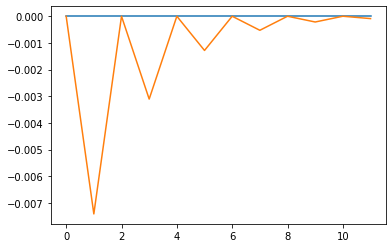

In [ ]:
plt.plot(bat2_1.errors[1:])

In [ ]:
bat=bat2_1
fig2_1 = go.Figure()
n=1 #H3PO4
fig2_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig2_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig2_1.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig2_1.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig2_1.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig2_1.update_layout(title='', width=1200, height=600,)
fig2_1.show()

In [ ]:
bat2_2=LLC.Battery(stages_num=3, Oin=90, Ain=20, yin=[0, 0.1/71*98], xin=[0, 36/71*98], EQUIL=EQUIL_yph_2_2)

In [ ]:
LLC.BatteryTable(bat2_2)

,Stage 1,Stage 2,Stage 3
"Org in, ton/hr",90.000000,90.927606,91.799779
"y1 in, %",0.000000,0.000000,0.000000
"y2 in, %",0.138028,1.156779,2.095870
"Aq in, ton/hr",17.926518,18.796948,20.000000
"x1 in, %",0.000000,0.000000,0.000000
"x2 in, %",43.871019,46.470183,49.690141
"Org out, ton/hr",90.927606,91.798846,93.002831
"y1 out, %",0.000000,0.000000,0.000000
"y2 out, %",1.156779,2.094876,3.362324
"Aq out, ton/hr",16.998911,17.925708,18.796948


In [ ]:
bat=bat2_2
fig2_2 = go.Figure()
n=1 #H3PO4
fig2_2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig2_2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig2_2.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig2_2.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig2_2.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig2_2.update_layout(title='', width=1200, height=600,)
fig2_2.show()

# YPH3 with SO4

In [ ]:
bat4=LLC.Battery(5, 90, 19, [0.5, 0.1/71*98, 0.06], [0, 48/71*98, .1], EQUIL=EQUIL_yph_3, eff=0.9)

In [ ]:
LLC.BatteryTable(bat4)

,Stage 1,Stage 2,Stage 3,Stage 4,Stage 5
"Org in, ton/hr",90.000000,90.288905,91.215980,92.331371,94.012060
"y1 in, %",0.500000,0.000000,0.000000,0.000000,0.000000
"y2 in, %",0.138028,0.954826,1.959247,3.140060,4.866437
"y3 in, %",0.060000,0.060948,0.062553,0.065347,0.069401
"Aq in, ton/hr",12.077921,13.004993,14.120384,15.801069,19.000000
"x1 in, %",0.000000,0.000000,0.000000,0.000000,0.000000
"x2 in, %",47.056450,50.814973,54.676966,59.466691,66.253521
"x3 in, %",0.013657,0.028285,0.049259,0.075092,0.100000
"Org out, ton/hr",90.288905,91.215978,92.331371,94.012058,97.210990
"y1 out, %",0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
bat=bat4
fig4_1 = go.Figure()
n=1 #H3PO4
fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig4_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig4_1.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig4_1.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig4_1.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig4_1.update_layout(title='', width=1200, height=600,)
fig4_1.show()

In [ ]:
bat=bat4
fig4_2 = go.Figure()
n=2 #SO4
fig4_2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig4_2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig4_2.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig4_2.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig4_2.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig4_2.update_layout(title='', width=1200, height=600,)
fig4_2.show()

# Process 1

In [ ]:
from scipy import optimize

In [ ]:
Ain=10.
xin=[0,36./71*98] #[P2O5,]
def process1(x):
    bat2_Oin= x[0]
    bat1_Ain = x[1]
    bat2_yin=[0,x[2],]
    bat1_xin=[0,x[3],]
    bat1=LLC.Battery(stages_num=5, Oin=90, Ain=bat1_Ain, yin=[0,0.1/71*98], xin=bat1_xin, EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=.7)
    bat2=LLC.Battery(stages_num=5, Oin=bat2_Oin, Ain=20, yin=bat2_yin, xin=[0, 36/71*98], EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=.7)
    e1 = bat1.Ain-bat2.Aout-Ain
    e2 = bat2.Oin-bat1.Oout
    e3 = bat1.xin[1]- (bat2.xout[1] * bat2.Aout + xin[1] * Ain) / (bat2.Aout + Ain)
    e4 = bat2.yin[1]-bat1.yout[1]
    return [e1, e2, e3, e4,]

In [ ]:
sol1 = optimize.root(process1, [90, 20, .1/71*98, 36/71*98])
sol1.x

array([93.54162158, 28.56597529,  3.91894711, 47.16456347])

In [ ]:
bat3=LLC.Battery(stages_num=5, Oin=90, Ain=sol1.x[1], yin=[0, 0.1/71*98], xin=[0, sol1.x[3]], EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=.7)
bat4=LLC.Battery(stages_num=5, Oin=sol1.x[0], Ain=20, yin=[0, sol1.x[2]], xin=[0, 36/71*98], EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=.7)

In [ ]:
bat=bat3
fig3_1 = go.Figure()
n=1 #H3PO4
fig3_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig3_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig3_1.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig3_1.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig3_1.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig3_1.update_layout(title='', width=1200, height=600,)
# fig3_1.show()

bat=bat4
# fig4_1 = go.Figure()
n=1 #H3PO4
fig3_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig3_1.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig3_1.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig3_1.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig3_1.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig3_1.update_layout(title='', width=1200, height=600,)
fig3_1.show()

# Proc 2

In [ ]:
Ain=10.
xin=[0, 36/71*98,] #[P2O5,]
def process2(x):
    bat1_Oin = x[0]
    bat1_Ain = x[1]
    bat2_Oin = x[2]
    bat2_Ain = x[3]
    bat3_Oin = x[4]
    bat1_xin = [0, x[5]]
    bat2_yin = [0, x[6]]
    bat2_xin = [0, x[7]]
    bat3_yin = [0, x[8]]
    bat1=LLC.Battery(stages_num=3, Oin=bat1_Oin, Ain=bat1_Ain, yin=[0, 0.1/71*98], xin=bat1_xin, EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=[[.9],[.8],[1]])
    bat2=LLC.Battery(stages_num=3, Oin=bat2_Oin, Ain=bat2_Ain, yin=bat2_yin, xin=bat2_xin, EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=.7)
    bat3=LLC.Battery(stages_num=3, Oin=bat3_Oin, Ain=20, yin=bat3_yin, xin=[0, 36/71*98], EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=[[.7],[.5],[.9]])
    e1 = bat2.Oin-bat1.Oout
    e2 = bat2.yin[1]-bat1.yout[1]
    e3 = bat1.Ain-bat2.Aout
    e4 = bat1.xin[1]-bat2.xout[1]
    e5 = bat3.Oin-bat2.Oout
    e6 = bat3.yin[1]-bat2.yout[1]
    e7 = bat2.Ain-bat3.Aout-Ain
    e8 = bat2.xin[1]- (bat3.xout[1] * bat3.Aout + xin[1] * Ain) / (bat3.Aout + Ain)
    e9 = bat1.xout[1] - 33/71*98
    return [e1, e2, e3, e4, e5, e6, e7, e8, e9]

In [ ]:
sol2 = optimize.root(process2, [90, 20, 90, 20, 90, 36/71*98, .1/71*98, 36/71*98, .1/71*98]) #unknowns:[bat1_Oin, bat1_Ain, bat2_Oin, bat2_Ain, bat3_Oin, bat1_xin, bat2_yin, bat2_xin, bat3_yin]
sol2.x

array([31.64043794, 29.66600507, 33.5770196 , 29.92963246, 33.82777574,
       49.12372694,  5.89764787, 49.57185736,  6.59520737])

In [ ]:
bat2_1=LLC.Battery(stages_num=3, Oin=sol2.x[0], Ain=sol2.x[1], yin=[0, 0.1/71*98], xin=[0, sol2.x[5]], EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=[[.9],[.8],[1]])
bat2_2=LLC.Battery(stages_num=3, Oin=sol2.x[2], Ain=sol2.x[3], yin=[0, sol2.x[6]], xin=[0, sol2.x[7]], EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=.7)
bat2_3=LLC.Battery(stages_num=3, Oin=sol2.x[4], Ain=20, yin=[0, sol2.x[8]], xin=[0, 36/71*98], EQUIL=EQUIL_yph_2_1, convergence=5e-4, eff=[[.7],[.5],[.9]])

In [ ]:
bat=bat2_1
fig2 = go.Figure()
n=1 #H3PO4
fig2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig2.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig2.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig2.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig2.update_layout(title='', width=1200, height=600,)

bat=bat2_2
# fig2 = go.Figure()
n=1 #H3PO4
fig2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig2.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig2.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig2.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig2.update_layout(title='', width=1200, height=600,)

bat=bat2_3
# fig2 = go.Figure()
n=1 #H3PO4
fig2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_tag_list[:,n], name='Equilibrium', marker_color='black'))
fig2.add_trace(go.Scatter(x=bat.xout_list[:,n], y=bat.yout_list[:,n], name='Efficiency', marker_color='blue'))
fig2.add_trace(go.Scatter(x=np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])), y=np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])), mode = "markers+lines+text",
                          text= ['({:.2f},{:.2f})'.format(a,b) for a,b in zip(np.concatenate((bat.xout_list[:,n], [bat.xin_list[-1,n]])),np.concatenate((bat.yin_list[:,n], [bat.yout_list[-1,n]])))],
                          textposition ='bottom center', name='Operation', marker_color='green'))
fig2.update_xaxes(title_text="x, %")#, range=[0.5, 2])
fig2.update_yaxes(title_text="y, %")#, range=[0.5, 2])
fig2.update_layout(title='', width=1200, height=600,)

fig2.show()

# Purification 1